In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles = pd.read_csv("./articles.csv")
customers = pd.read_csv("./customers.csv")
transactions = pd.read_csv("./transactions_train.csv")

### Expolratory Dats Ananlysis 

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


here the customer_id and postcode are encoded

In [5]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


So transactions table contain customer_id and article_id which can be used as a foreign key to join all the tables

In [6]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


#### Missing Values

In [9]:
def calculate_missing_data(df):
    count_of_missing_points = df.isnull().sum().sort_values(ascending = False)
    percentage_of_missing_points = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([count_of_missing_points, percentage_of_missing_points], axis=1, keys=['Count', 'Percentage'])

In [10]:
calculate_missing_data(articles)

,Count,Percentage
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


As we can see only detail_desc has some missing values that account to 0.4% of the data so we can ommit it

In [11]:
calculate_missing_data(customers)

,Count,Percentage
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


Cumstomers table have a lot of missing data especially in columns Active and FN.

In [12]:
calculate_missing_data(transactions)

,Count,Percentage
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


###### Articles

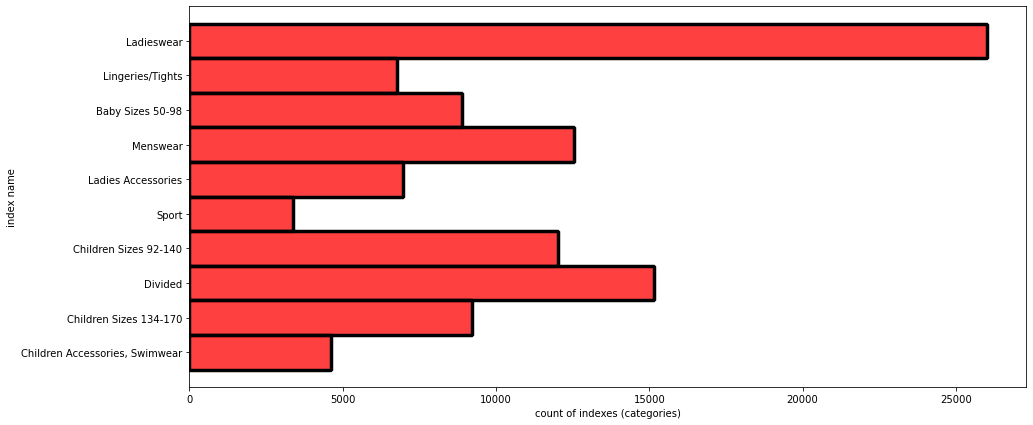

In [13]:
fig, axis = plt.subplots(figsize=(15, 7))
axis = sns.histplot(data=articles, y='index_name', color='red')
axis.set_xlabel('count of indexes (categories)')
axis.set_ylabel('index name')
plt.show()

We can see that data has highest number of ladieswear and least number of sports wear

In [14]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


We cannot tell any significance from this description as most of the columns are codes and ids.

###### Transactions

Making new columns of year, month and date for t_date column

In [15]:
print("Min date:", transactions.t_dat.min())
print("Max date:", transactions.t_dat.max())

Min date: 2018-09-20
Max date: 2020-09-22


In [16]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
#add year, month, and week column
transactions['year'] = transactions['t_dat'].dt.isocalendar().year
transactions['month'] = transactions['t_dat'].dt.month
transactions['week'] = transactions['t_dat'].dt.isocalendar().week

In [17]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018,9,38
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018,9,38
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018,9,38
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018,9,38
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018,9,38


In [18]:
# number of transactions in each year
transactions.year.value_counts()

2019    16361525
2020    11039440
2018     4387359
Name: year, dtype: Int64

For articles table, lets take year as 2018 and index category as womens wear in order to make computations easier

In [19]:
#transactions table for the year 2018
trannsactions_2018 = transactions[(transactions.year == 2018)]

In [20]:
# articles table for women wear
articles_women_wear = articles[(articles.index_name == 'Ladieswear')]

In [21]:
# merge 2018 transactions with women wear articles
women_wear_2018 = pd.merge(trannsactions_2018, articles_women_wear, on="article_id", how="left")

In [22]:
women_wear_2018.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018,9,38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018,9,38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018,9,38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018,9,38,685687.0,W YODA KNIT OL OFFER,...,Campaigns,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1023.0,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018,9,38,685687.0,W YODA KNIT OL OFFER,...,Campaigns,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1023.0,Special Offers,V-neck knitted jumper with long sleeves and ri...


In [23]:
women_wear_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387359 entries, 0 to 4387358
Data columns (total 32 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    int64         
 3   price                         float64       
 4   sales_channel_id              int64         
 5   year                          UInt32        
 6   month                         int64         
 7   week                          UInt32        
 8   product_code                  float64       
 9   prod_name                     object        
 10  product_type_no               float64       
 11  product_type_name             object        
 12  product_group_name            object        
 13  graphical_appearance_no       float64       
 14  graphical_appearance_name     object        
 15  colour_group_code             fl

In [24]:
women_wear_2018.shape

(4387359, 32)

Still we see that there are nearly 4.4 million data points present so lets reduce it to a season : 

In [25]:
#Extract 2018 winter (11,12) data
masking = (transactions.year == 2018) & (transactions.month >= 11)
transaction_winter_2018 = transactions.loc[masking]

In [26]:
# merge 2018 summer transactions with women wear articles : winter i.e. november and december
women_wear_2018_winter = pd.merge(transaction_winter_2018, articles_women_wear, on="article_id", how="right")

In [27]:
women_wear_2018_winter.shape

(961909, 32)

In [28]:
women_wear_2018_winter.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-11-01,0769f05e4ff5a70e906cf5bc77d9535ec21c6cef5538ad...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,2018-11-01,0c44061274a6eaeec897b89520eae026f61dba43e16157...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2018-11-01,0e96235473e2915efbd406190641115aa1bc924e57aa97...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


#### Top 10 customers by num of transactions in november and december of 2018 in ladies wear 

In [29]:
transactions_by_id = women_wear_2018_winter.groupby('customer_id').count()

In [30]:
transactions_by_id.sort_values(by='price', ascending=False)['price'][:10]

customer_id
f9ba0e5503340c7af3dd51514f97e7dfa7120a18189c70d1a1a8b2a5d07f1647    194
c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e3    183
a13f92a54d578aa16f574be5b4f94493142d7019e1c7c4b2261123387bf5416c     96
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a     96
c8e66df6acaa8a7e16d42c4f4868da06f139fad5f2015c8b817c683f775e26ac     92
84c34f4f564db1f437943c77af41f83bf6fd7c01701cbb050070369176905712     85
f4cc6939c97e28f4be2ae7075e50ca214de5bbc5b54b5f903a4f99d13a2bd7df     83
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54     83
43ce95eb5f8055b5774e5c25b49bc764f9384aee1e05e30050003973a9bf12ef     80
64d38564063ac407d2d2b43d3acfad4ec4d3ab455e624caf46bb3625a01fb092     80
Name: price, dtype: int64

In [31]:
calculate_missing_data(women_wear_2018_winter)

,Count,Percentage
t_dat,16503,1.715651
week,16503,1.715651
customer_id,16503,1.715651
price,16503,1.715651
sales_channel_id,16503,1.715651
year,16503,1.715651
month,16503,1.715651
detail_desc,5355,0.556705
product_code,0,0.000000
prod_name,0,0.000000


we see only 1.7% missing data hence we eliminate the data

In [32]:
women_wear_2018_winter = women_wear_2018_winter.dropna(axis = 0, how ='any') 

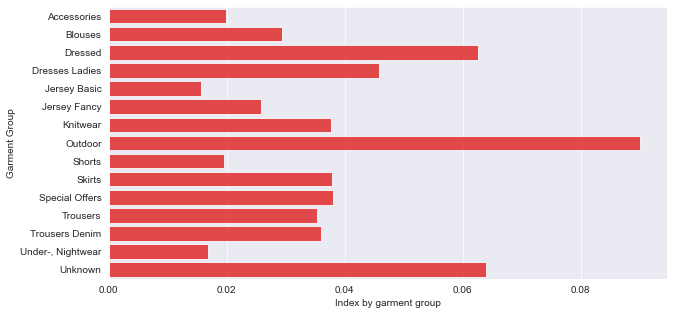

In [33]:
garment_price = women_wear_2018_winter[['garment_group_name', 'price']].groupby('garment_group_name').mean()
sns.set_style("darkgrid")
fig, axis = plt.subplots(figsize=(10,5))
axis = sns.barplot(x=garment_price.price, y=garment_price.index, color='red', alpha=0.8)
axis.set_xlabel('Index by garment group')
axis.set_ylabel('Garment Group')
plt.show()

We see mean price of outdoor clothing is highest while lowest is of jersey basic

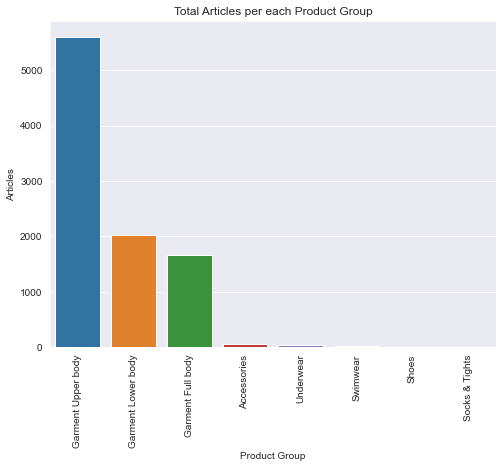

In [34]:
temp = women_wear_2018_winter.groupby(["product_group_name"])["article_id"].nunique()
temp_df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
temp_df = temp_df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Total Articles per each Product Group')
graph = sns.barplot(x = 'Product Group', y="Articles", data=temp_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

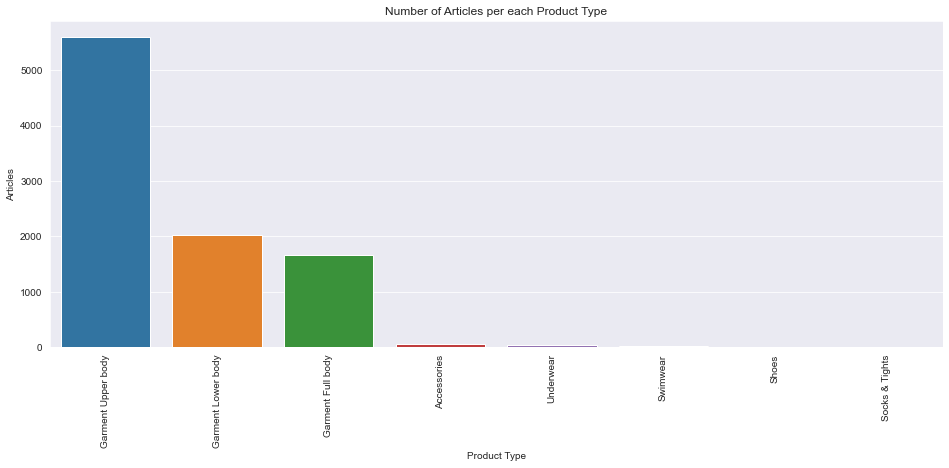

In [35]:
temp_df = women_wear_2018_winter.groupby(["product_type_name"])["article_id"].nunique()

temp_df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(temp_df['Product Type'].unique())
temp_df = temp_df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title('Number of Articles per each Product Type')
graph = sns.barplot(x = 'Product Type', y="Articles", data=temp_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

### Data Extraction

Since months taken are only two we will take weeks to group

In [36]:
#unique week number in 2018 winter data
women_wear_2018_winter.week.unique()

<IntegerArray>
[44, 45, 46, 47, 48, 49, 50, 51, 52]
Length: 9, dtype: UInt32

In [37]:
#because of less memory lets only take 50,000 points
women_wear_2018_winter_some_df = pd.DataFrame()
week = 44
for w in range(44,53):
    women_wear_2018_winter_some_df = women_wear_2018_winter_some_df.append(women_wear_2018_winter[women_wear_2018_winter["week"] == w][:5000])
    

In [38]:
women_wear_2018_winter_some_df.shape

(45000, 32)

In [39]:
women_wear_2018_winter_some_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,prod_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-11-01,0769f05e4ff5a70e906cf5bc77d9535ec21c6cef5538ad...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,2018-11-01,0c44061274a6eaeec897b89520eae026f61dba43e16157...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2018-11-01,0e96235473e2915efbd406190641115aa1bc924e57aa97...,108775015,0.008458,1.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,2018-11-01,13601d393fcaf51faff73621a3569df7f5ed2557f9a27d...,108775015,0.008458,2.0,2018,11.0,44,108775,Strap top,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [40]:
women_wear_2018_winter_some_df.to_csv('women_wear_2018_winter.zip', index=False,
          compression=compression_opts) 

NameError: name 'compression_opts' is not defined